In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("creditcard.csv")

# Display dataset info
print(df.info())
print(df.head())

# Count fraud vs non-fraud transactions
print(df["Class"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Data Preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df['Time'] = StandardScaler().fit_transform(df[['Time']])

# Drop unnecessary columns
X = df.drop(columns=["Class"])
y = df["Class"]

# Train-Test Split (stratified to handle imbalance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


#### Apply Anomaly Detection Algorithms
#### 1. Isolation Forest

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score

iso_forest = IsolationForest(contamination=0.001, random_state=42)
iso_forest.fit(X_train)
y
y_pred = iso_forest.predict(X_test)
y_pred = [1 if pred == -1 else 0 for pred in y_pred]
# Evaluate Performance
print("Isolation Forest Results:\n", classification_report(y_test, y_pred))

Isolation Forest Results:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.39      0.26      0.31        98

    accuracy                           1.00     56962
   macro avg       0.69      0.63      0.65     56962
weighted avg       1.00      1.00      1.00     56962



#### 2. Local Outlier Factor (LOF)

In [5]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.001)
y_pred_lof = lof.fit_predict(X_test)

# Convert -1 to 1 (Fraud)
y_pred_lof = [1 if pred == -1 else 0 for pred in y_pred_lof]

# Evaluate Performance
print("Local Outlier Factor Results:\n", classification_report(y_test, y_pred_lof))

Local Outlier Factor Results:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.04      0.02      0.03        98

    accuracy                           1.00     56962
   macro avg       0.52      0.51      0.51     56962
weighted avg       1.00      1.00      1.00     56962



#### 3. One-Class SVM

In [6]:
from sklearn.svm import OneClassSVM

# Train One-Class SVM
svm_model = OneClassSVM(kernel="rbf", gamma=0.001, nu=0.001)
svm_model.fit(X_train)

# Predict anomalies
y_pred_svm = svm_model.predict(X_test)
y_pred_svm = [1 if pred == -1 else 0 for pred in y_pred_svm]

# Evaluate Performance
print("One-Class SVM Results:\n", classification_report(y_test, y_pred_svm))

One-Class SVM Results:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.20      0.13      0.16        98

    accuracy                           1.00     56962
   macro avg       0.60      0.57      0.58     56962
weighted avg       1.00      1.00      1.00     56962



### Visualizing Anomalies 

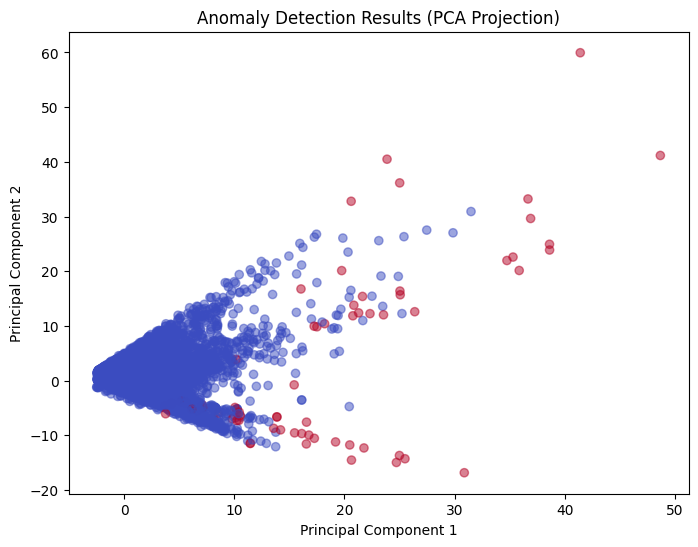

In [7]:
from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap="coolwarm", alpha=0.5)
plt.title("Anomaly Detection Results (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
